## Statistical inference

Μethod of drawing conclusions, and establishing their certainty, given a set of observational data that is subject to random variation. There are two broad categories of statistics in wide-spread use in astronomy:

---
__Frequentist approach__: Sees probability as the long-run expected frequency of occurrence (probabilities are fundamentally related to frequencies of events).



Frequentists use Likelihoods (and p-values) to test models and hypotheses. They assume the hypothesis is true (null hypothesis) and ask how likely their data is to occur, given the hypothesis. The Likelihood is the probability that we would obtain our data "D", given a model "M" or a hypothesis "H". It is written $\mathcal{L}$ = P(D∣M) = P(D∣H). In plain English, the Likelihood is the probability of the data, given the model. (Typically, if p$<$0.05 the null hypothesis is rejected).


*Much of the criticism of frequentism arises from the fact that most of the time this is the wrong question to ask. We really want to know is $P(H∣D)$ - how likely the hypothesis is, given the data!*

---

__Bayesian approach__: Probability is related to the degree of belief; it is a measure of the plausibility of an event given incomplete knowledge (probabilities are fundamentally related to our own knowledge about an event). 


The basic idea of Bayesian inference is to continually update our prior beliefs about events as new evidence is presented. As more and more evidence is accumulated, our prior beliefs are steadily "washed out" by any new data.


It's based on the __Bayes' Theorem__:

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$


For example, in case of model fitting, the Bayesian approach is to find the probability distribution of the model parameters (θ), given the data (D). We use the Bayes' theorem to see how this relates to model fitting by minimising $χ^{2}$. Using Bayes theorem, we can write:

$$P(θ∣D) = \frac{P(D|θ) P(θ)}{P(D)} $$




* __P(θ|D)__ : The __posterior__, or the (conditional) probability distribution. This is our knowledge of the model parameters given both our data and our prior information and this is the result we want to compute.


* __P(D|θ)__ : The __likelihood__ - how likely is our data given our model parameters and our prior knowledge (proportional to the $\mathcal{L}$=P(D|θ) in the frequentist approach)


* __P(θ)__   : The __prior__, which represents the prior probability that the model parameters take a particular value.


* __P(D)__   : The __data probability__, the evidence. It is the odds of getting our data given only our prior knowledge, regardless of the model parameters (in practice it amounts to simply a normalization term).



Very often the evidence is very hard to calculate. We can get round this by noting that it is a constant (i.e it doesn't depend on the model parameters), so we can write: $P(A|B) \sim P(B|A) \times P(A)$

#### When to use the Bayesian approach??

Good question! In model fitting, for example, when should you fit a model with $χ^{2}$ minimisation, and when should you use a Bayesian method? Remember we can write Bayes theorem as $P(θ∣D)\sim P(θ)P(D∣θ)$. Therefore, if P(θ)=const, we have $P(θ∣D)\sim P(D∣θ)=\mathcal{L}$. In other words, if we suspect our prior distributions are flat - independent of the parameter values - then Bayesian fitting and $χ^{2}$ minimisation are identical. 



*Choosing distributions for the priors can sometimes be hard. It is always subjective. The need to choose a prior is one of the most common criticisms of Bayesian methods. Priors can reflect physical certainty (i.e we know a speed must lie between 0 and c) or can reflect previous measurements of a model parameter.*






## A Simplistic Example


Let's assume that there is a race between two horses: A and B, and we want to determine which horse to bet on. 

1. A and B horses have raced against each other on twelve previous occasions (all two-horse races). 
2. Of these last twelve races, A won five and B won the other seven. 

What is the probability of horse A winning the next race?   $\frac{5}{12} $


Now let's add new factors into the calculation: 

1. It turns out that on three of A horse's previous five wins, it had rained heavily before the race. 
2. It had rained only once on any of the days that he lost.
3. On the day of the race in question, it is raining. 

Now, how does this extra information affect our bet decision?

* If we ignore the information about the weather:    $\frac{5}{12}$ or __41.7%__

* If we use only the new information about the weather solely on the winning races of horse "A", someone would guess: $\frac{3}{5}$ or __60%__


What we need to do is to combine the two pieces of information to get some kind of overall probability. 
Let's tabulate what we know:


                                       Rain              Not Rain
  
                                        3                   2                       Horse "A" wins

                                        1                   6                       Horse "A" loses
                                        
                                        
Having all in hand now, what is the probability of Horse "A" winning, given that it is raining?    $\frac{3}{4}$ or __75%__                    

Let's do the same, using the Bayes' Theorem this time:

$$P(A_{win}|Rain) = \frac{P(Rain|A_{win}) P(A_{win})}{P(Rain)} = \frac{\frac{3}{5} * \frac{5}{12}}{\frac{4}{12}} = 0.75$$ 
                 
**Pay attention to**:

* $P(A_{win}|Rain) \neq P(Rain|A_{win})$ 
(the probability of horse "A" winning, given that it is raining, is not at all the same as the probability of its being raining, when horse "A" wins)
* how much the winning percentage of horse "A" has risen up when taking into account new information (weather in this case): from 41.7% to 75% !!

## Main differences between classical and Bayesian approach:

* Frequentism considers probabilities to be related to frequencies of real or hypothetical events.
* Bayesianism considers probabilities to measure degrees of knowledge.
* Frequentist analyses generally proceed through use of point estimates and maximum likelihood approaches.
* Bayesian analyses generally compute the posterior either directly or through some version of MCMC sampling.

## Astronomical example: Counting photons


Imagine that we point our telescope to the sky, and observe the light coming from a single star. For the moment, we assume that the star's true flux is constant with time ($F_{true}$=constant) and we ignore effects like sky noise and systematic errors. We also assume that we perform a series of N measurements with our telescope, where the $i^{th}$ measurement reports the observed photon flux $F_{i}$ and error $e_{i}$. Given this set of measurements D {$F_{i}$,$e_{i}$}, what is our best estimate of the true flux $F_{true}$ ?





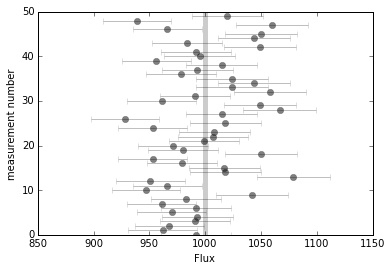

In [289]:
# Generating some simple photon count data
import numpy as np
from scipy import stats
np.random.seed(1)  # for repeatability

F_true = 1000  # true flux, say number of photons measured in 1 second
N = 50 # number of measurements
F = stats.poisson(F_true).rvs(N)  # N measurements of the flux
e = np.sqrt(F)  # errors on Poisson counts estimated via square root


%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.2)
ax.set_xlabel("Flux");ax.set_ylabel("measurement number");



### Frequentist approach:

Given a single observation $D_{i}=(F_{i},e_{i})$, we can compute the probability distribution of the measurement given the true flux $F_{true}$:


* $P(D_{i}| F_{true})=\frac{1}{\sqrt{2\pi e_{i}^{2}}} exp[\frac{-(F_{i} - F_{true})^{2}}{2e_{i}^{2}}]$


Construct the likelihood function by computing the product of the probabilities for each data point:  

* $\mathcal{L}(D|F_{true}) = \prod P(D_{i}|F_{true}) $


Compute the log-likelihood:

* $\log{\mathcal{L}} = -\frac{1}{2} \sum [\log{(2\pi e^{2}) + \frac{(F_{i} - F_{true})^{2}}{e_{i}^{2}}]}$

Determine $F_{true}$ such that the likelihood is maximized (i.e. by setting $dlog\mathcal{L} / dF_{true}=0$):

* $F_{est} = \frac{\sum w_{i} F_{i}}{\sum w_{i}}$, where $w_{i} = \frac{1}{e_{i}^{2}}$


With the error of this estimate (i.e. the standard deviation of the Gaussian approximation):

* $\sigma_{est} = (\sum w_{i})^{-\frac{1}{2}}$

In [290]:
w = 1. / e ** 2
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, (w * F).sum() / w.sum(), w.sum() ** -0.5, N))


      F_true = 1000
      F_est  = 998 +/- 4 (based on 50 measurements)
      


### Bayesian approach:

The Bayesian approach, as you might expect, begins and ends with probabilities. It recognizes that what we fundamentally want to compute is our knowledge of the parameters in question, i.e. in this case:

$$P(F_{true}| D)$$ 

and apply the Bayes' Theorem:

$$P(F_{true}∣D) = \frac{P(D|F_{true}) P(F_{true})}{P(D)} $$


As the dimension of the model grows, Bayesian calculations often depend on sampling methods such as Markov Chain Monte Carlo (MCMC).




To perform this MCMC, we start by defining Python functions for the prior $P(F_{true})$, the likelihood $P(D|F_{true})$, and the posterior $P(F_{true}|D)$, noting that none of these need be properly normalized. Our model here is one-dimensional, but to handle multi-dimensional models we'll define the model in terms of an array of parameters θ, which in this case is $θ=[F_{true}]$:





In [291]:
def log_prior(theta):
    return 1   # flat prior                        

#def log_prior(theta):
#    return 


def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                         + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

Now we set up the problem, including generating some random starting guesses for the multiple chains of points.

In [292]:
ndim = 1  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# we'll start at random locations between 0 and 2000
starting_guesses = 2000 * np.random.rand(nwalkers, ndim)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points

The array sample should contain a series of 50000 points drawn from the posterior. Let's plot them and check:

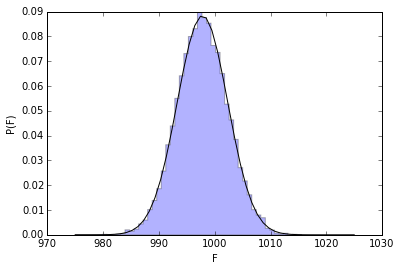

In [293]:
# plot a histogram of the sample
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, normed=True)

# plot a best-fit Gaussian
F_fit = np.linspace(975, 1025)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(F_fit)

plt.plot(F_fit, pdf, '-k')
plt.xlabel("F"); plt.ylabel("P(F)")

In [294]:
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, np.mean(sample), np.std(sample), N))


      F_true = 1000
      F_est  = 998 +/- 5 (based on 50 measurements)
      


### The Bayesian approach yields the same result as the frequentist approach! Why? (e.g. non-informative, flat prior...)